In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# salary is our target - we want to determine which features affect it the most

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
df = pd.read_csv(DATA_URL + "adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Check shape of data
df.shape

(32561, 15)

In [5]:
rows_with_question_mark = df[df.isin(['?']).any(axis=1)]

# Print rows with '?'
rows_with_question_mark.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K


In [6]:
# Check for missing values

df[df.isna().any(axis=1)]
df = df.replace('?', 'Unknown')

In [7]:
# check for colums names, datatypes, ect.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Check for min, max, min, std, percentiles

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# check stats for non numerical values

df.describe(include=["object"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
df.value_counts("workclass")

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

In [11]:
df.value_counts("education")

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
dtype: int64

In [12]:
df.value_counts("marital-status")

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
dtype: int64

In [13]:
df.value_counts("occupation")

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

In [14]:
df.value_counts("relationship")

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
dtype: int64

In [15]:
df.value_counts("race")

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
dtype: int64

In [16]:
df.value_counts("sex")

sex
Male      21790
Female    10771
dtype: int64

In [65]:
df.value_counts("native-country")

native-country
United-States                 29170
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [17]:
df.value_counts("salary", normalize = True)

salary
<=50K    0.75919
>50K     0.24081
dtype: float64

In [18]:
#replace/ map salary, sex values with boolean 0,1 values

df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1})
df['salary']=df['salary'].astype("int64")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [19]:
df['sex']=df['sex'].map({'Male': 0, 'Female': 1})
df['sex']=df['sex'].astype("int64")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


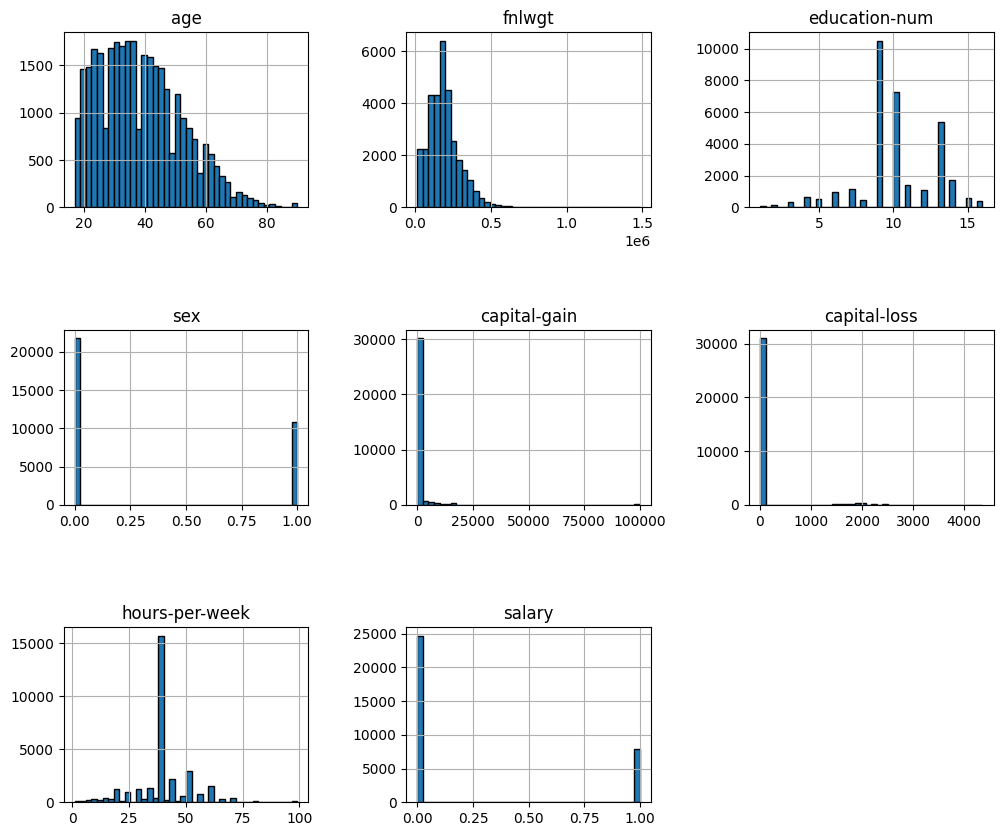

In [20]:
# make histogram of values

import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=40, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

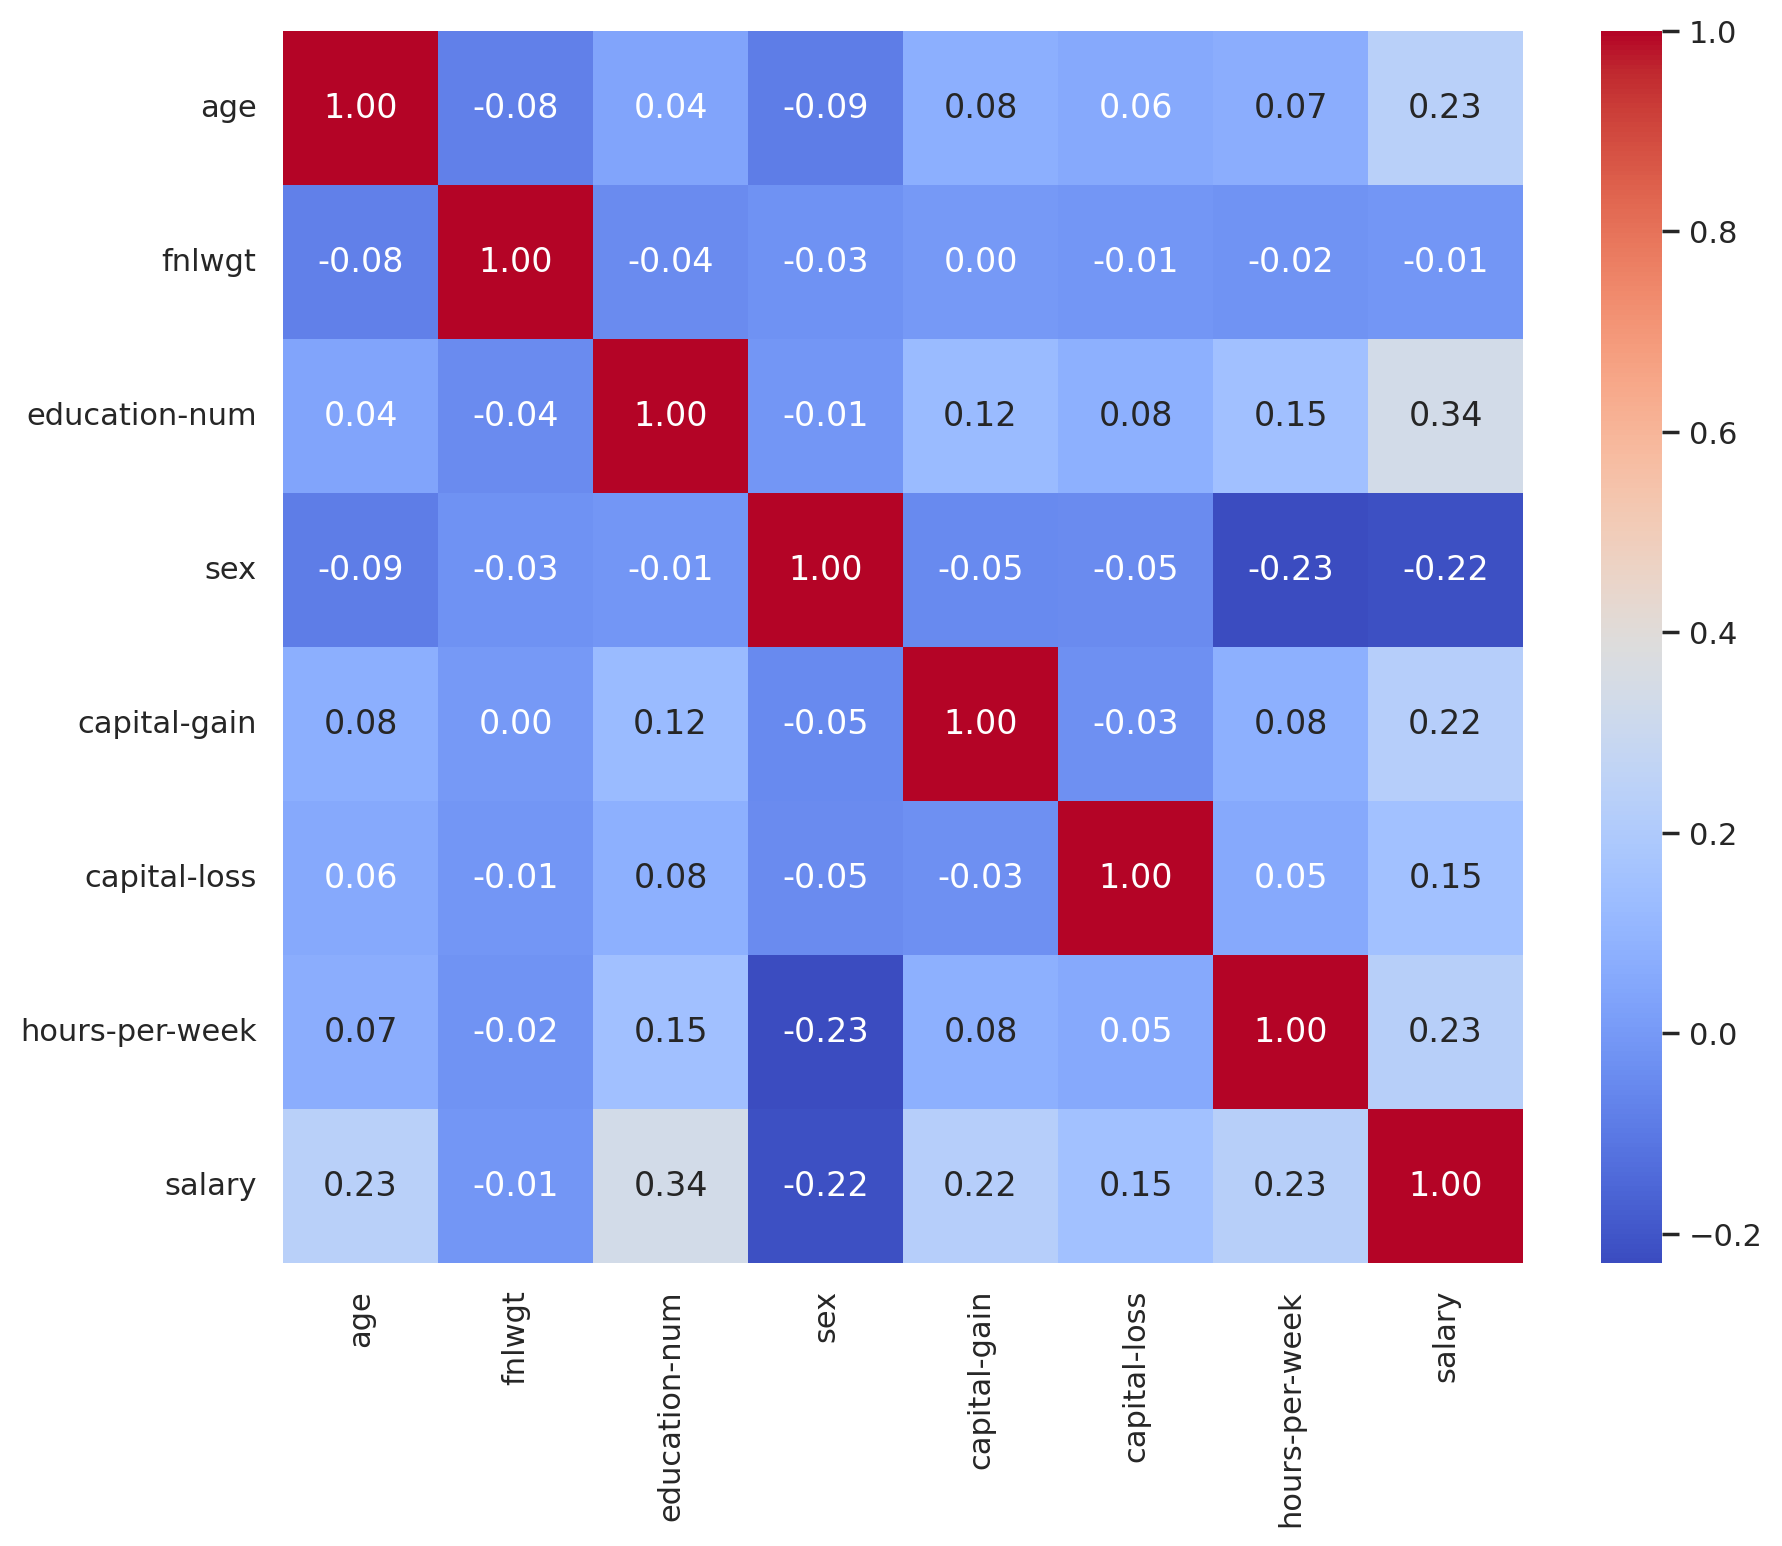

In [21]:
# Do correlation matrix

sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [22]:
# your conclusions, wchich features seem to corelate a lot with salary?

#A person working more hours per week would likely earn more.
#A person with more education would earn more.
# Males earn more
# Age could be a factor

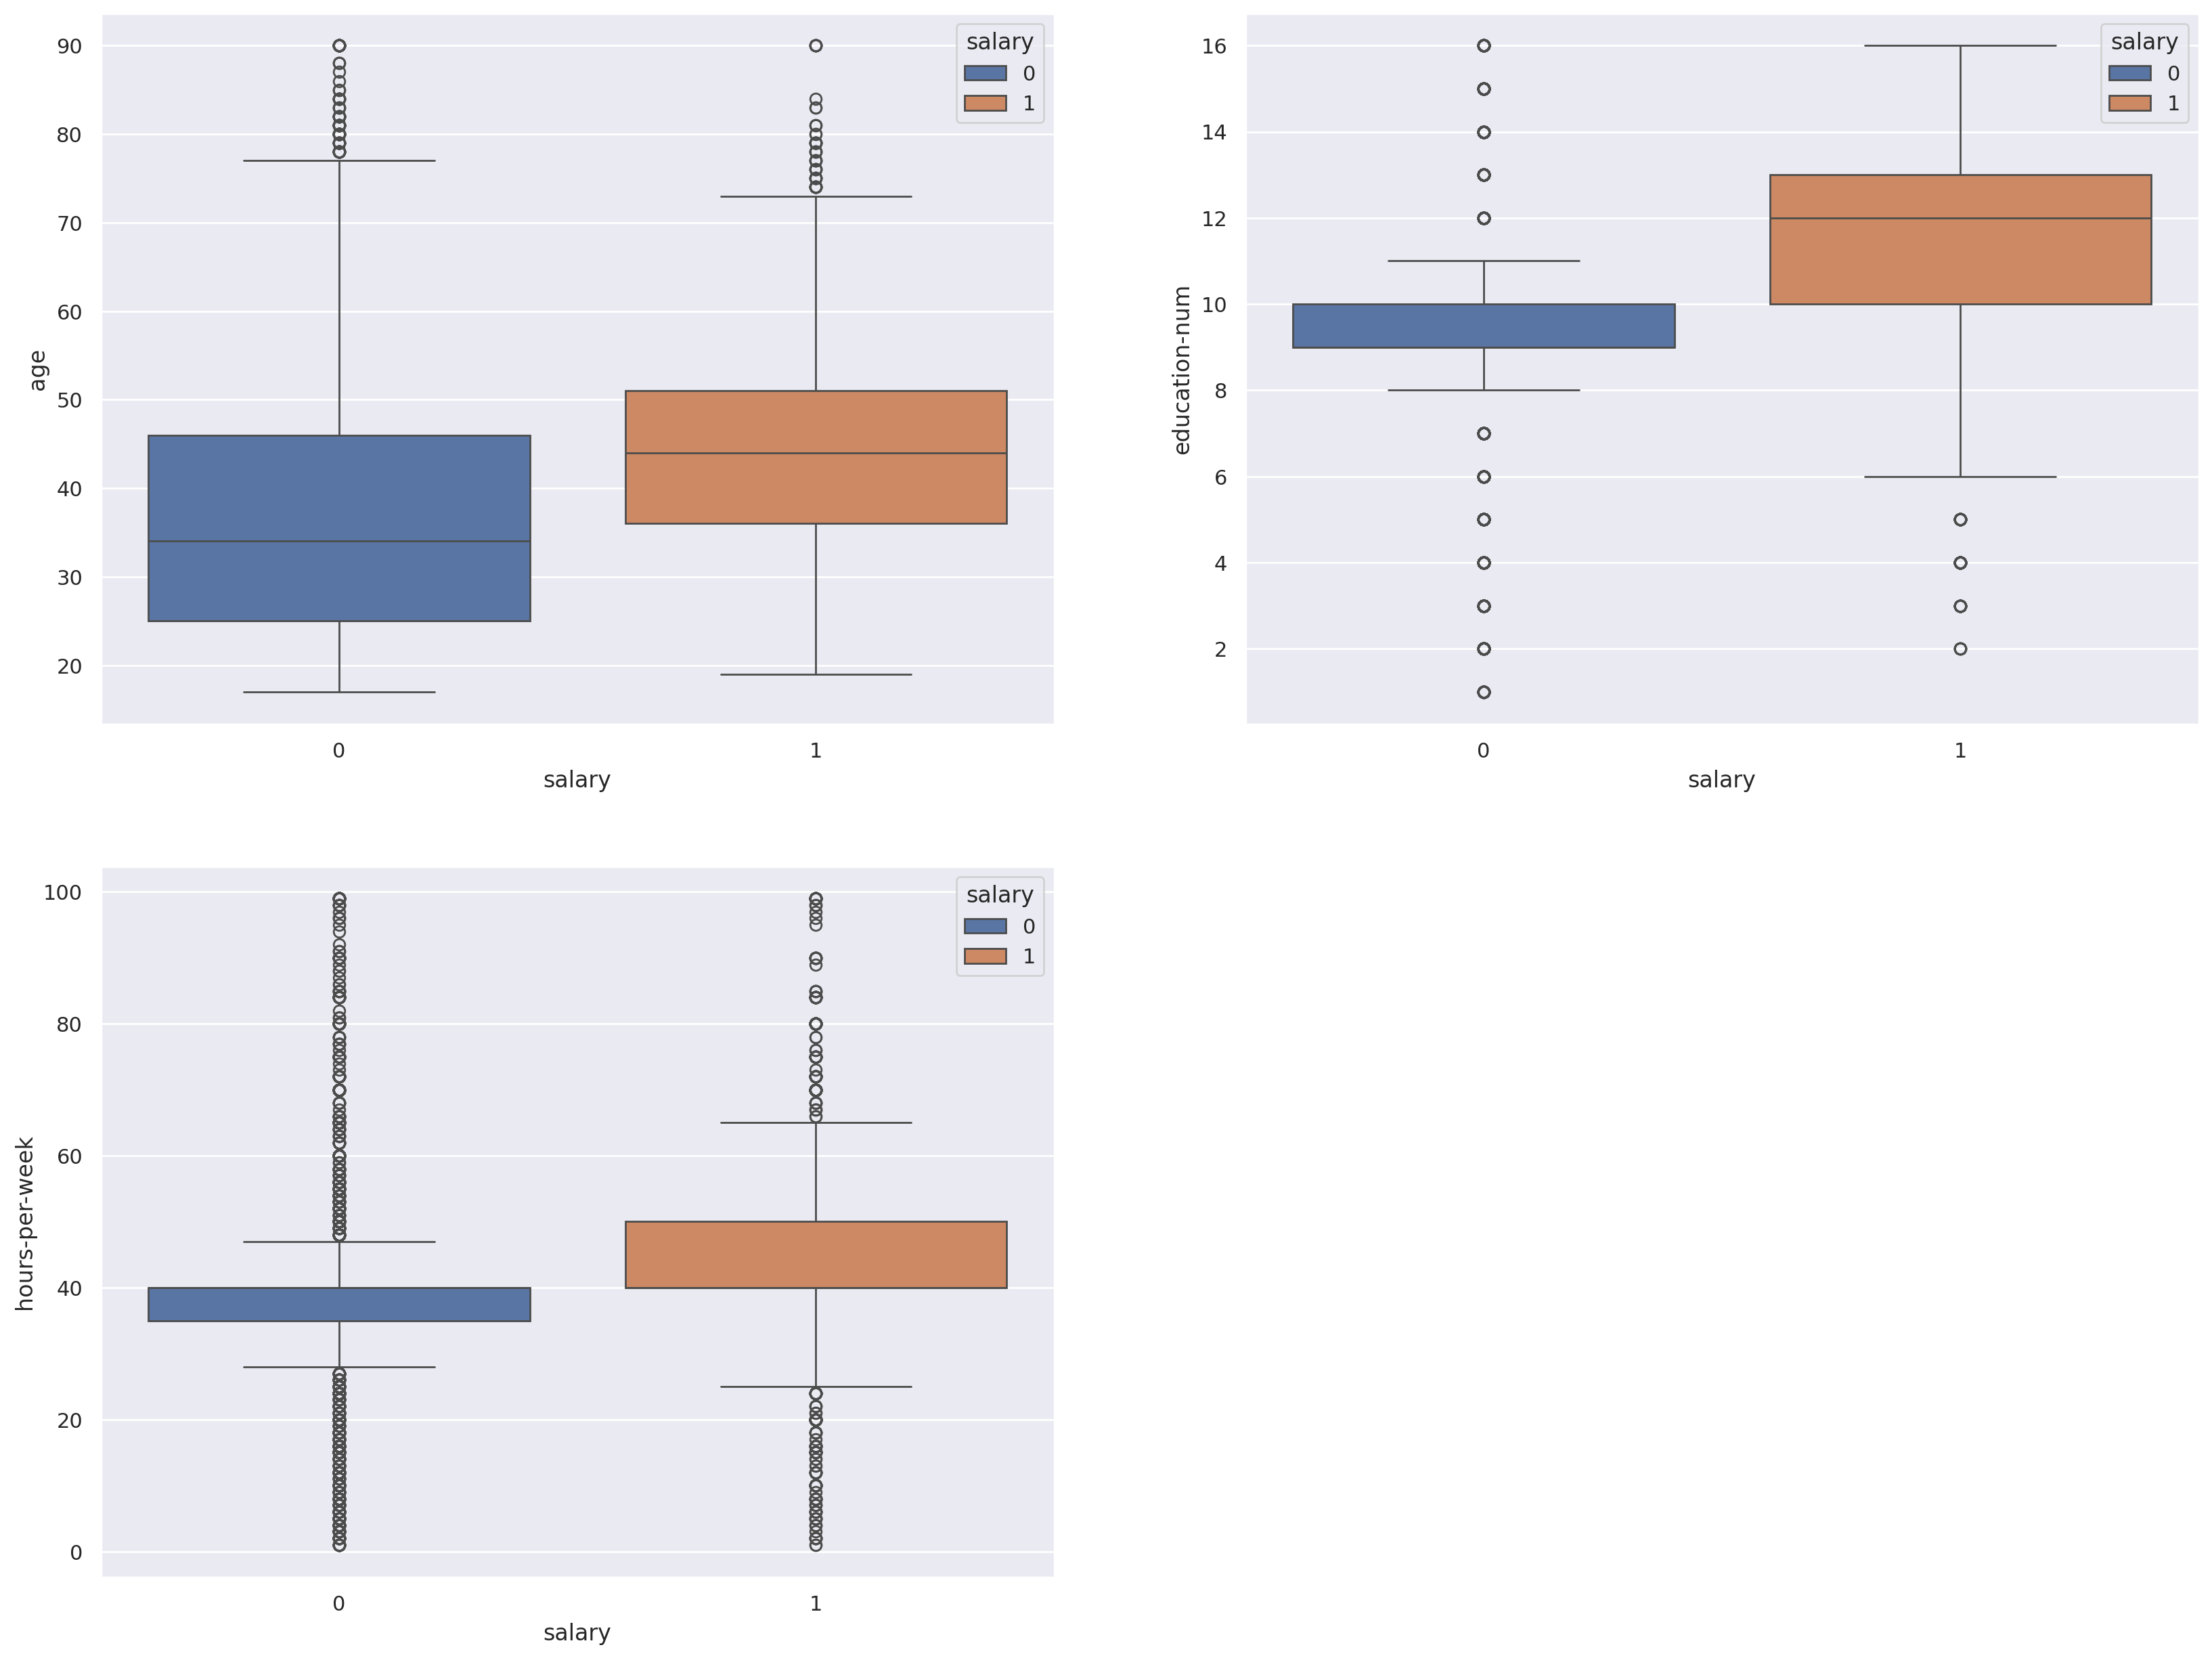

In [23]:
# analize the correlated variables with boxplots, contingency tables and countplots

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(data=df, x='salary', y="age", hue="salary", ax = axes[0, 0] )
sns.boxplot(data=df, x='salary', y="education-num", hue="salary", ax = axes[0, 1])
sns.boxplot(data=df, x='salary', y="hours-per-week", hue="salary", ax = axes[1, 0])
#sns.boxplot(data=df, x='salary', y="sex", hue="salary", ax = axes[1, 1])
axes[1, 1].axis('off')
plt.show()

In [24]:
# analize the correlated variables with boxplots, contingency tables and countplots

pd.crosstab(df["salary"], df["sex"], margins=True)

sex,0,1,All
salary,,,
0,15128,9592,24720
1,6662,1179,7841
All,21790,10771,32561


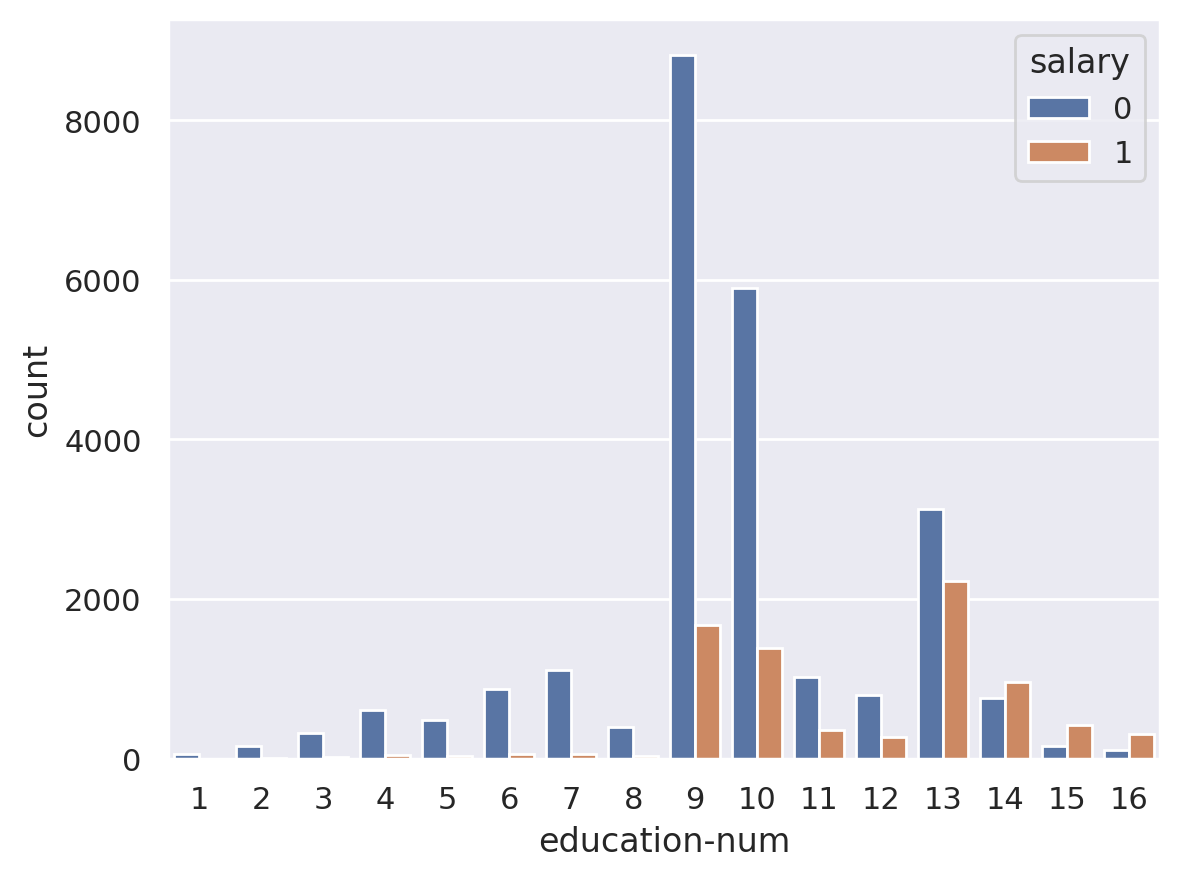

In [25]:
sns.countplot(x="education-num", hue="salary", data=df);

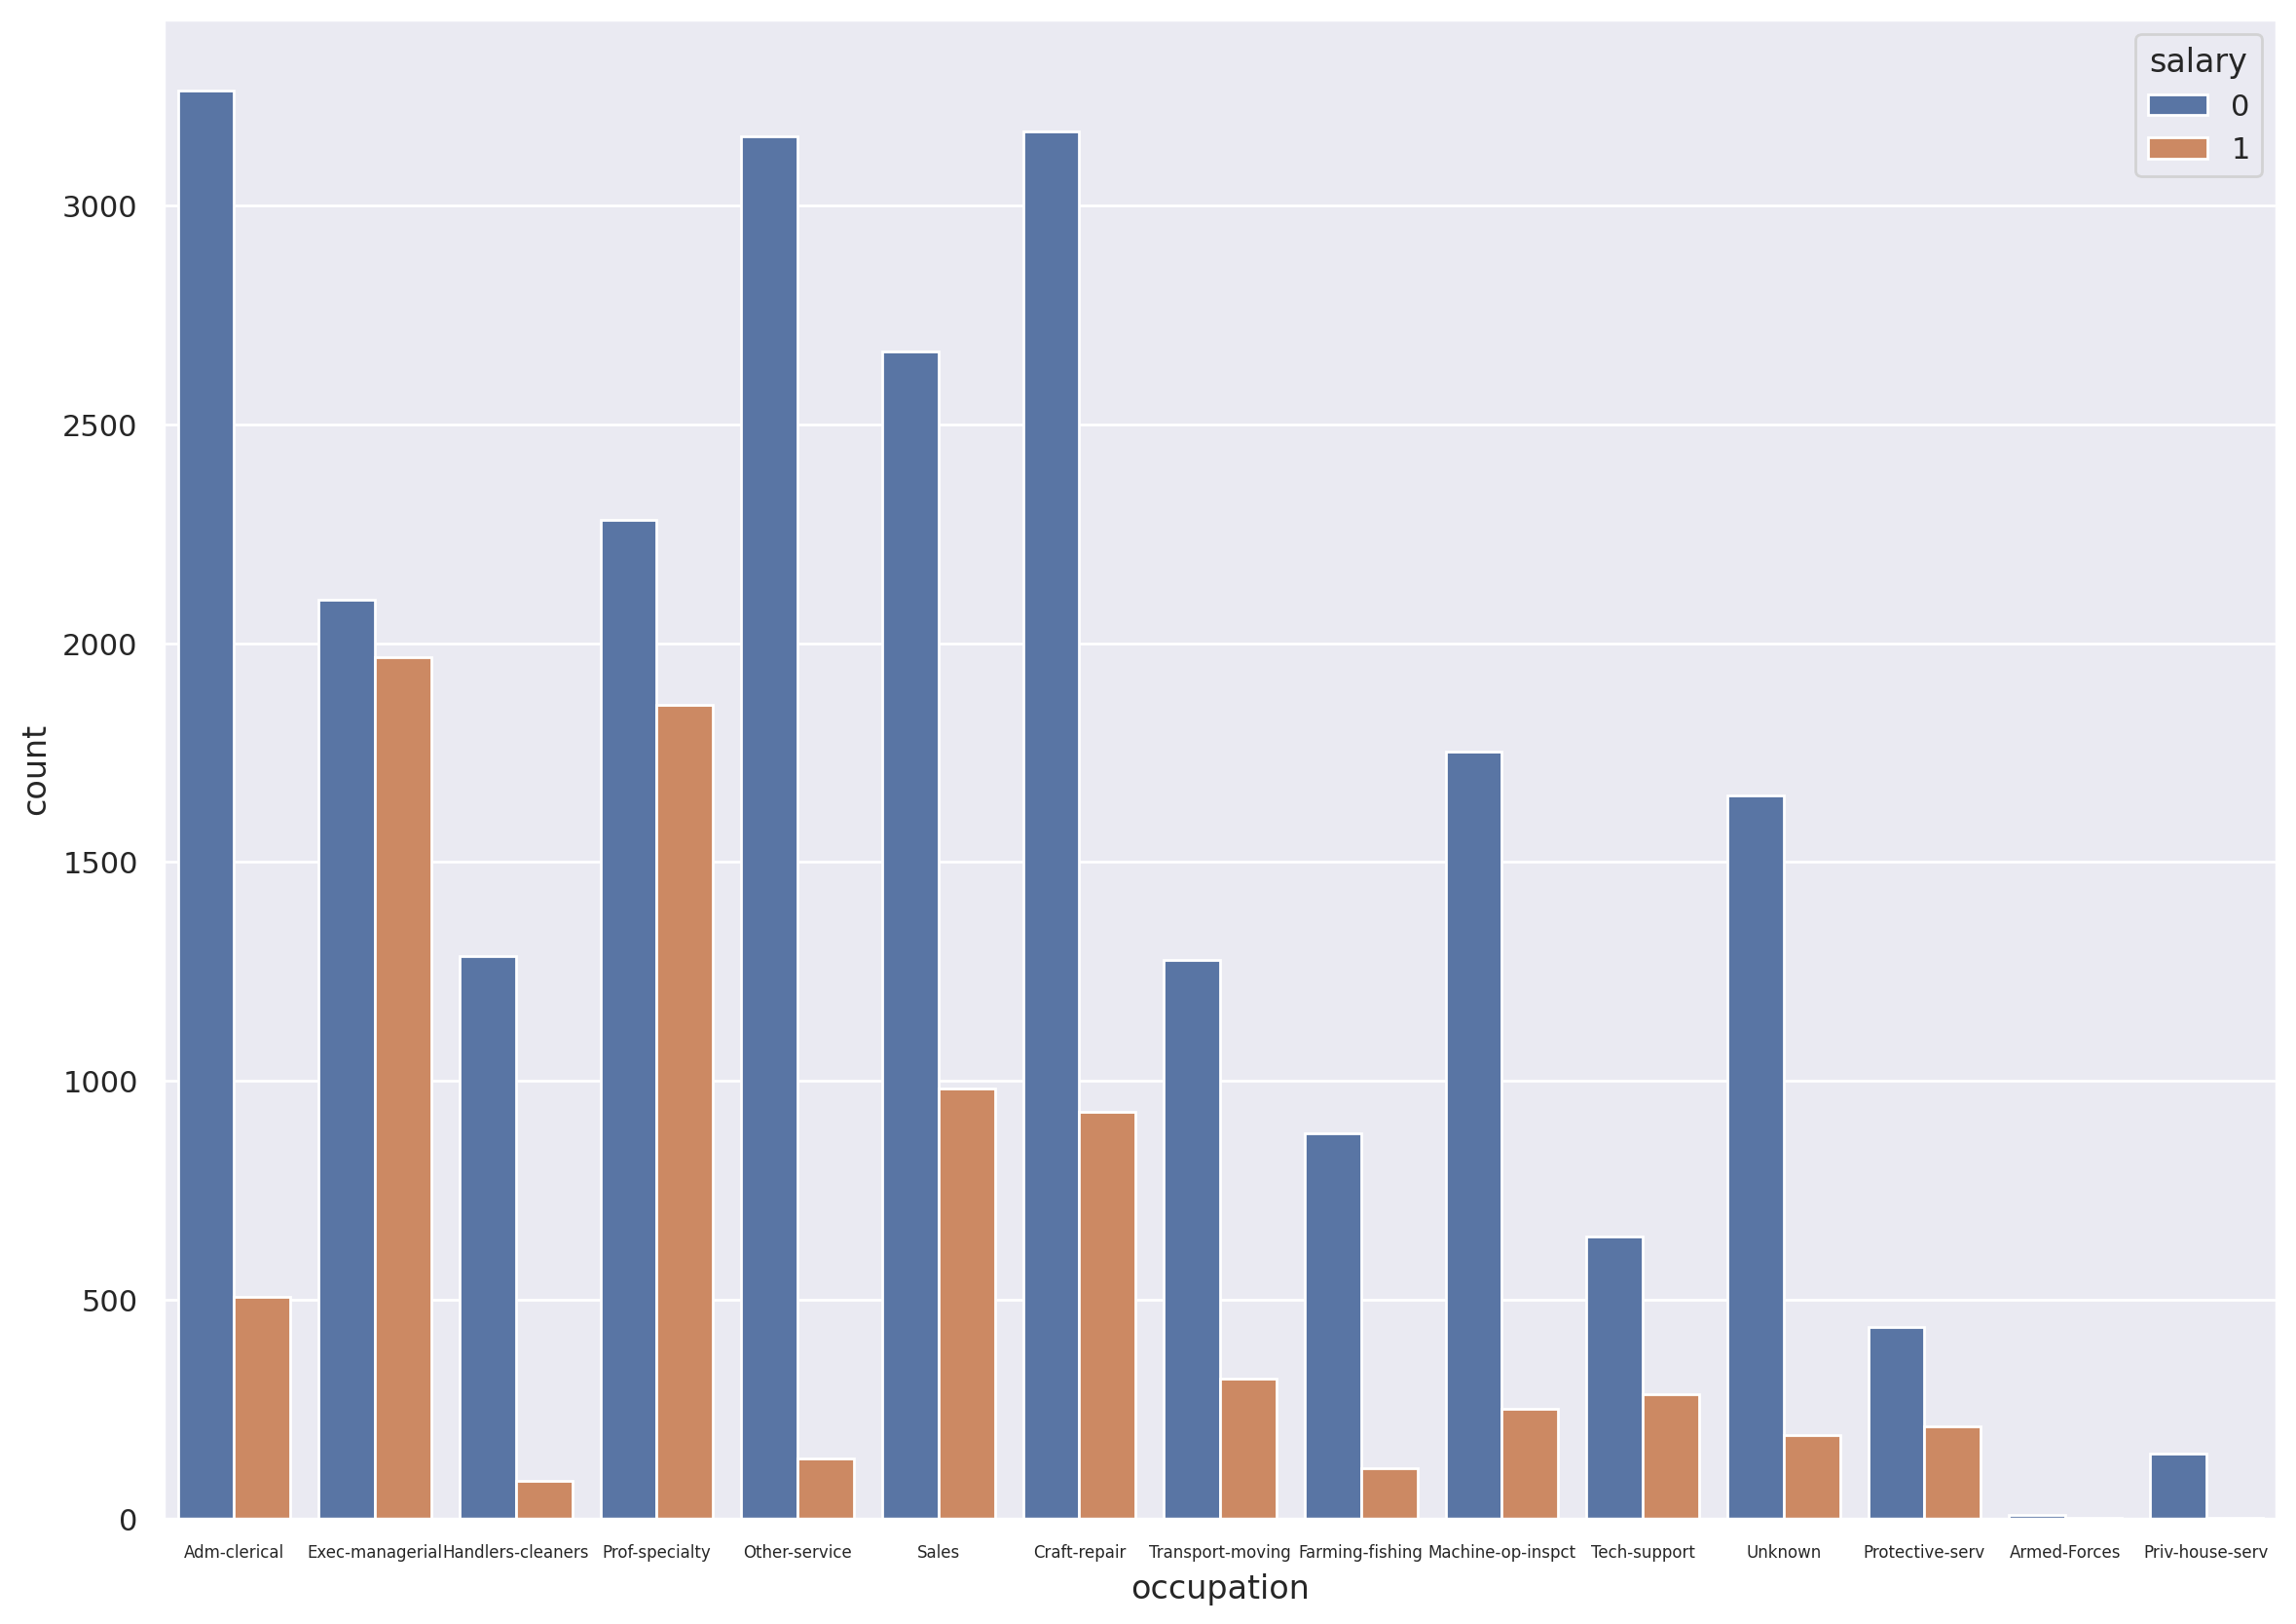

In [26]:
plt.figure(figsize=(14, 10))
plt.xticks(fontsize=6)
sns.countplot(x="occupation", hue="salary", data=df);
plt.show()

In [27]:
# people having >=9 education-num and working >=40 h/week are the more paid ones. Prof-speciality and exec-manager are earning more than other occupatons

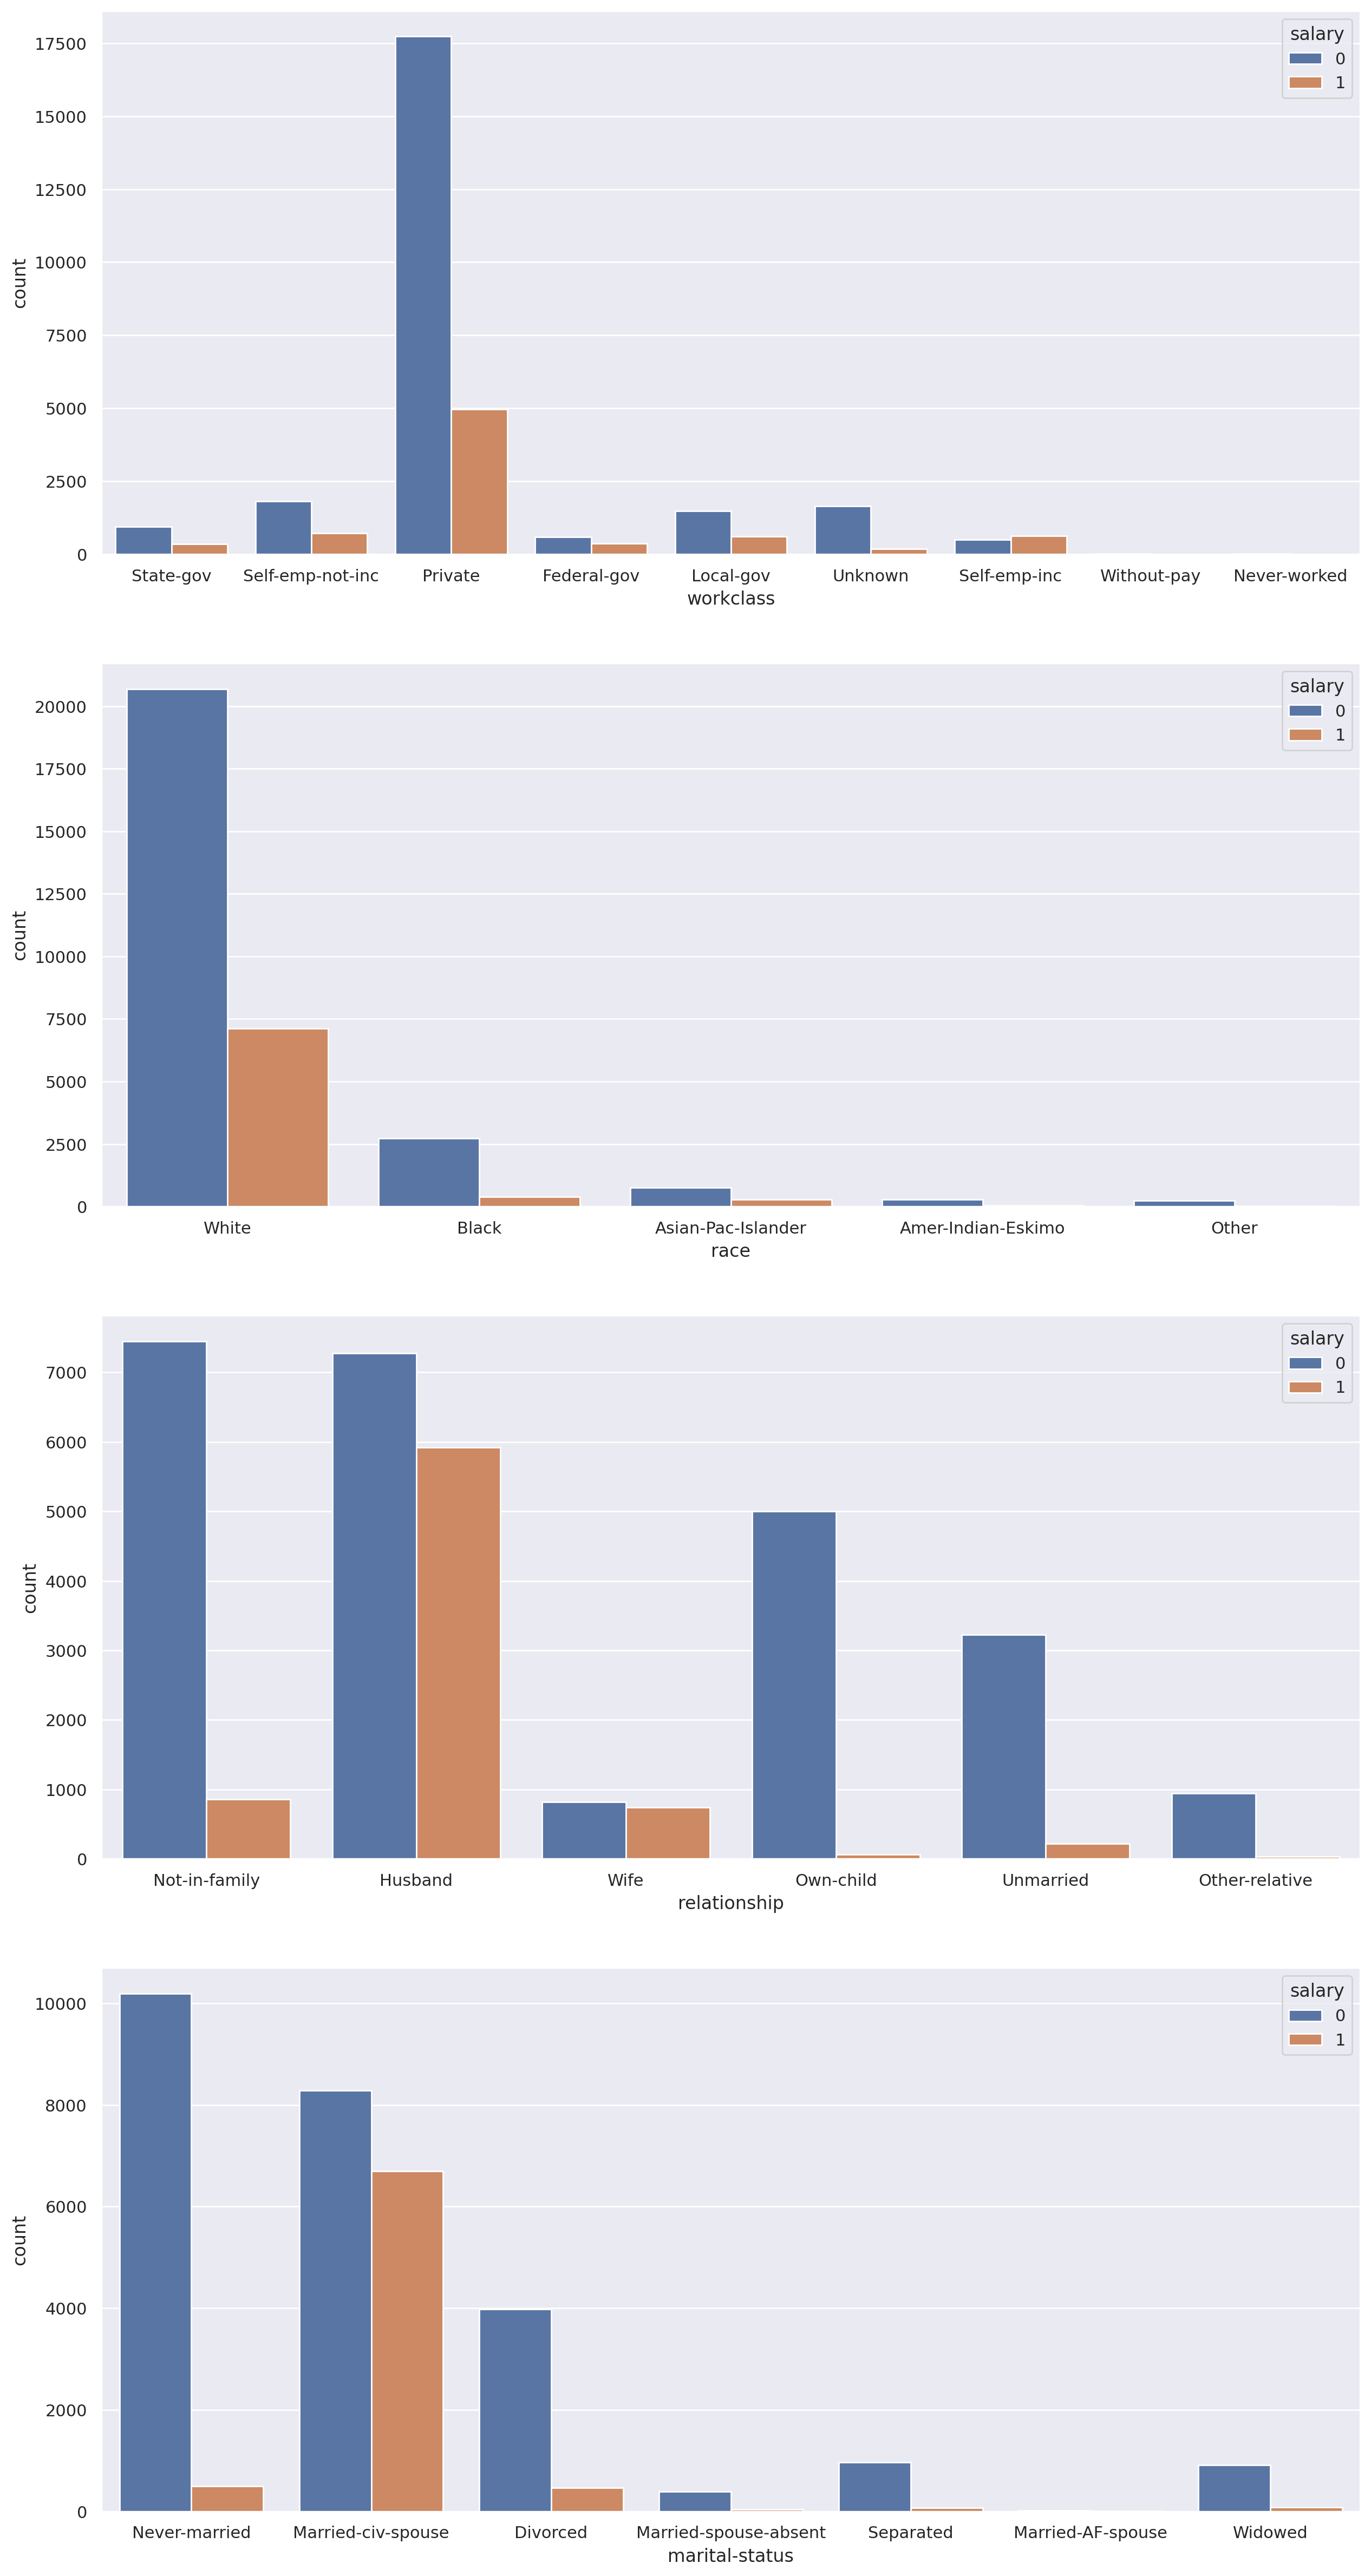

In [67]:
fig, axes = plt.subplots(4, 1, figsize=(15, 30))
sns.countplot(x='workclass',hue ='salary',data=df, ax = axes[0])
sns.countplot(x='race',hue ='salary',data=df, ax = axes[1])
sns.countplot(x='relationship',hue ='salary',data=df, ax = axes[2])
sns.countplot(x='marital-status',hue ='salary',data=df, ax = axes[3])
plt.show()

In [ ]:
# white people, private sector, husbands and marrued-civ-spouse are more paid

In [ ]:
df["high-educ"] = df["education-num"]>=9
df["male"] = df["sex"]==0
pd.crosstab( df["high-educ"] & df["male"], df["salary"], margins=True)
# if male and high education -> more likely to earn >=50k

salary,0,1,All
row_0,,,
False,12303,1400,13703
True,12417,6441,18858
All,24720,7841,32561


In [ ]:
df["high-educ"] = df["education-num"]>=9
df["female"] = df["sex"]==1
pd.crosstab( df["high-educ"] & df["female"], df["salary"], margins=True)
# this does not apply to female

salary,0,1,All
row_0,,,
False,16426,6685,23111
True,8294,1156,9450
All,24720,7841,32561


In [68]:
df['occ_unknown'] = df['occupation'] == 'Unknown'
df['workcls_unknown'] = df['workclass'] == 'Unknown'
df['nc_unknown'] = df['native-country'] == 'Unknown'

In [70]:
pd.crosstab(df['occ_unknown'], df['workcls_unknown'])

workcls_unknown,False,True
row_0,,
False,30725,1809
True,0,27


In [71]:
pd.crosstab(df['occ_unknown'] & df['nc_unknown'], df['workcls_unknown'])

workcls_unknown,False,True
row_0,,
False,30725,1809
True,0,27


In [ ]:
# 27 rows has 3 missing values
# 1836 rows has both occupation and workclass values unknown

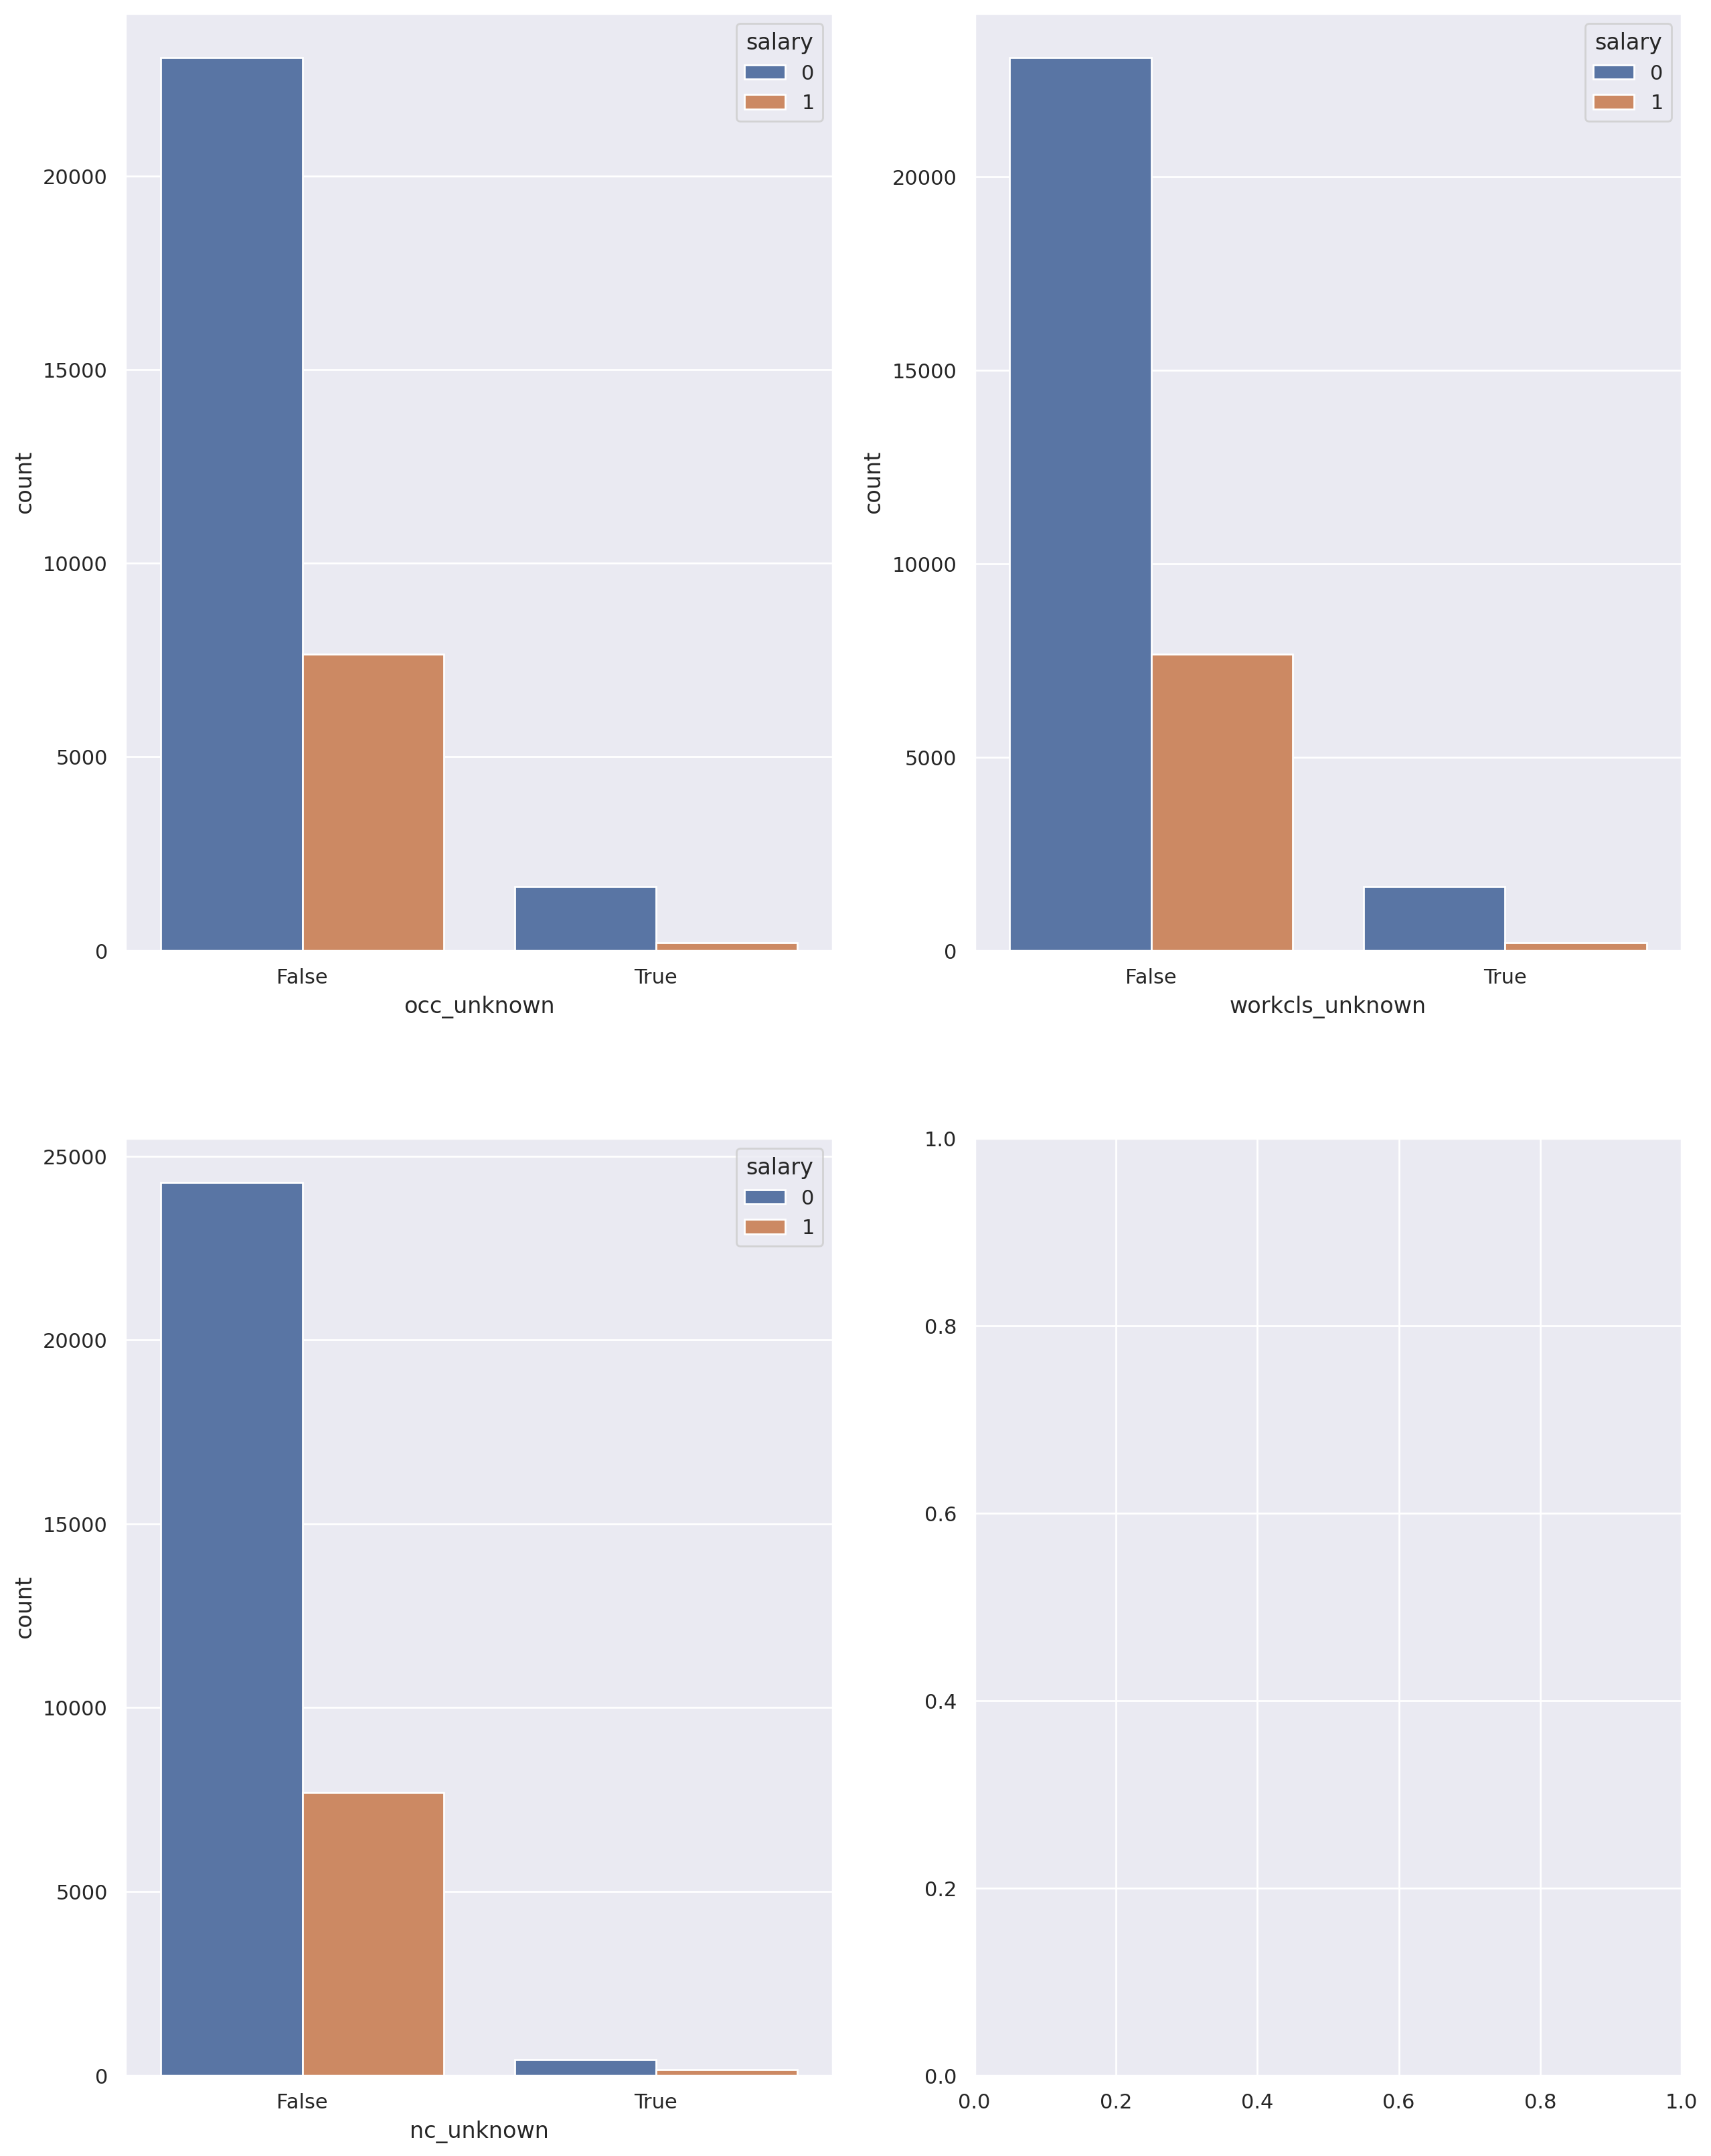

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(15, 20))
sns.countplot(x='occ_unknown',hue ='salary',data=df, ax = axes[0,0])
sns.countplot(x='workcls_unknown',hue ='salary',data=df, ax = axes[0,1])
sns.countplot(x='nc_unknown',hue ='salary',data=df, ax = axes[1,0])
plt.show()

In [40]:
pd.crosstab(df['occ_unknown'], df['salary'])

salary,0,1
occ_unknown,,
False,23068,7650
True,1652,191


In [78]:
pd.crosstab(df['workcls_unknown'], df['salary'])

salary,0,1
workcls_unknown,,
False,23075,7650
True,1645,191


In [79]:
pd.crosstab(df['nc_unknown'], df['salary'])

salary,0,1
nc_unknown,,
False,24283,7695
True,437,146


In [50]:
df.value_counts("salary", normalize = True)

salary
0    0.75919
1    0.24081
dtype: float64

In [100]:
filtered_df = df[~((df['workcls_unknown'] == 1) & (df['occ_unknown'] == 1) & (df['nc_unknown'] == 1))]

In [101]:
filtered_df.value_counts("salary", normalize = True)

salary
0    0.759114
1    0.240886
dtype: float64

In [102]:
filtered_df = filtered_df[~((filtered_df['workcls_unknown'] == 1) & (filtered_df['occ_unknown'] == 1))]

In [103]:
filtered_df.value_counts("salary", normalize = True)

salary
0    0.751017
1    0.248983
dtype: float64

In [110]:
no_unknown_df = df[~((df['workcls_unknown'] == 1) | (df['occ_unknown'] == 1) | (df['nc_unknown'] == 1))]

In [111]:
no_unknown_df.value_counts("salary", normalize = True)

salary
0    0.751078
1    0.248922
dtype: float64

In [113]:
rows_unknown= no_unknown_df[no_unknown_df.isin(['Unknown']).any(axis=1)]
rows_unknown

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,occ_unknown,workcls_unknown,nc_unknown
